<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
diabetes_df=pd.read_csv("/content/diabetes (1).csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


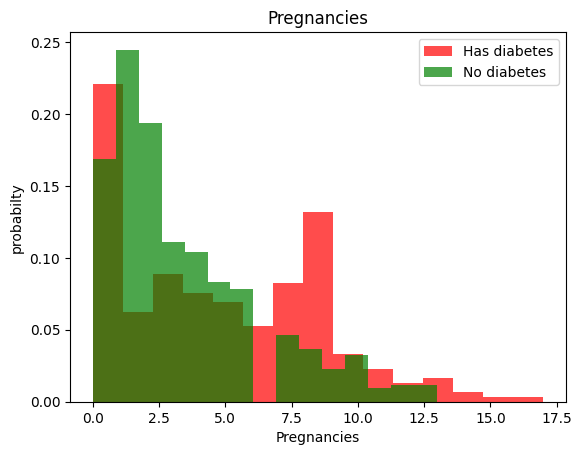

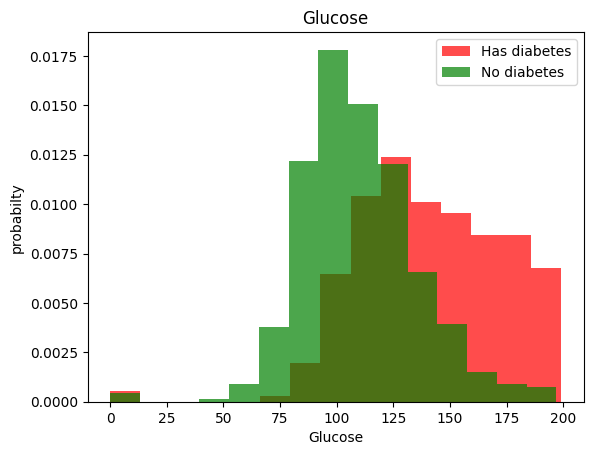

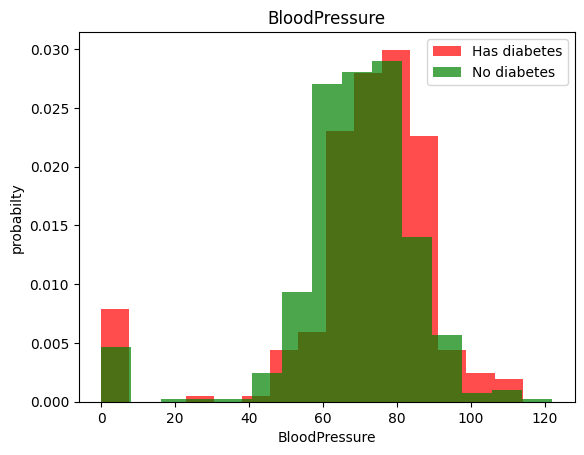

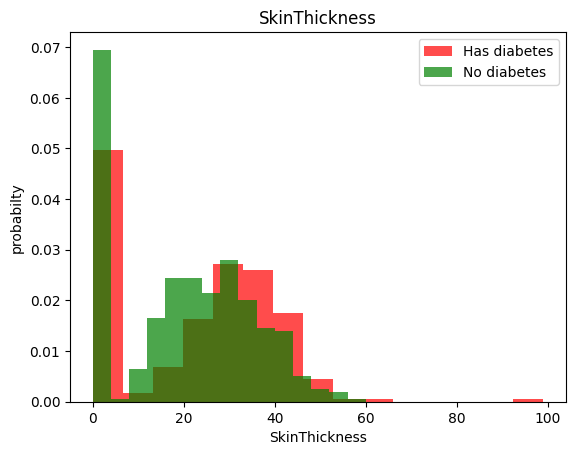

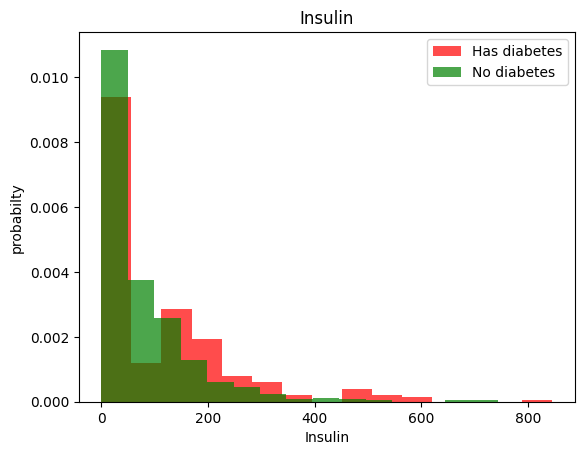

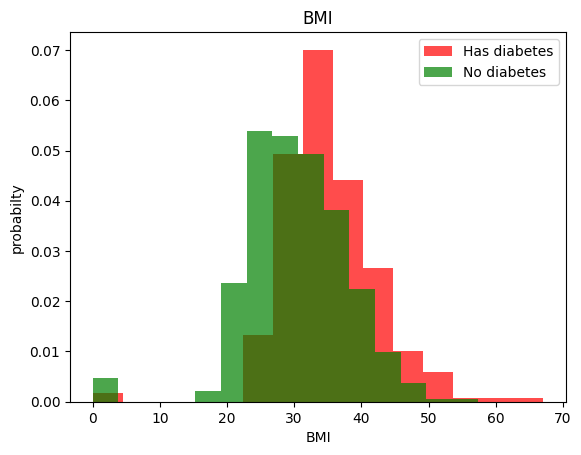

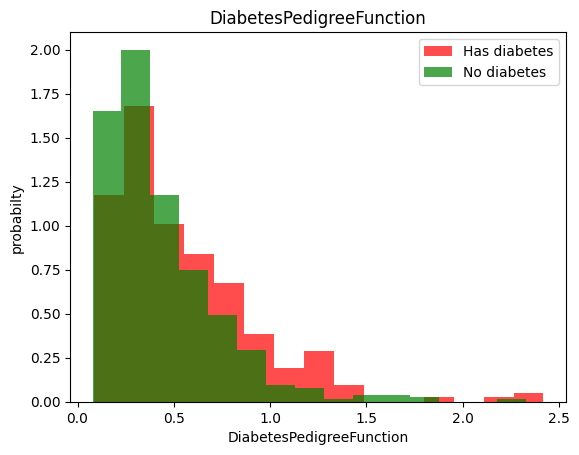

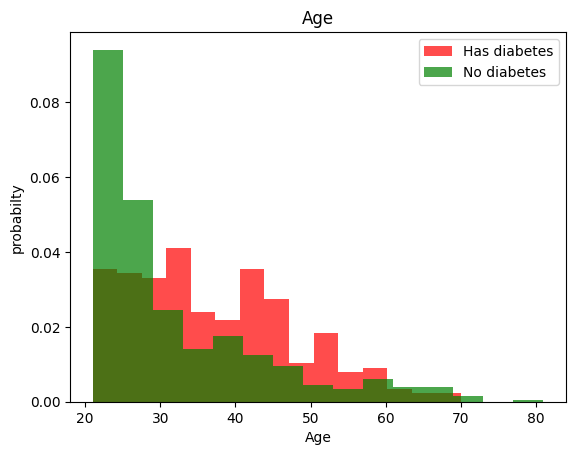

In [6]:

for i in range(len(diabetes_df.columns[:-1])):
  label = diabetes_df.columns[i]
  plt.hist(diabetes_df[diabetes_df["Outcome"]==1] [label] ,color ="RED" ,label = "Has diabetes", alpha = 0.7 ,density = True , bins = 15 )
  plt.hist(diabetes_df[diabetes_df["Outcome"]==0] [label] ,color ="GREEN" , label = "No diabetes" ,alpha = 0.7 ,density = True , bins = 15 )
  plt.title(label)
  plt.xlabel (label)
  plt.ylabel("probabilty")
  plt.legend()
  plt.show()

<Axes: >

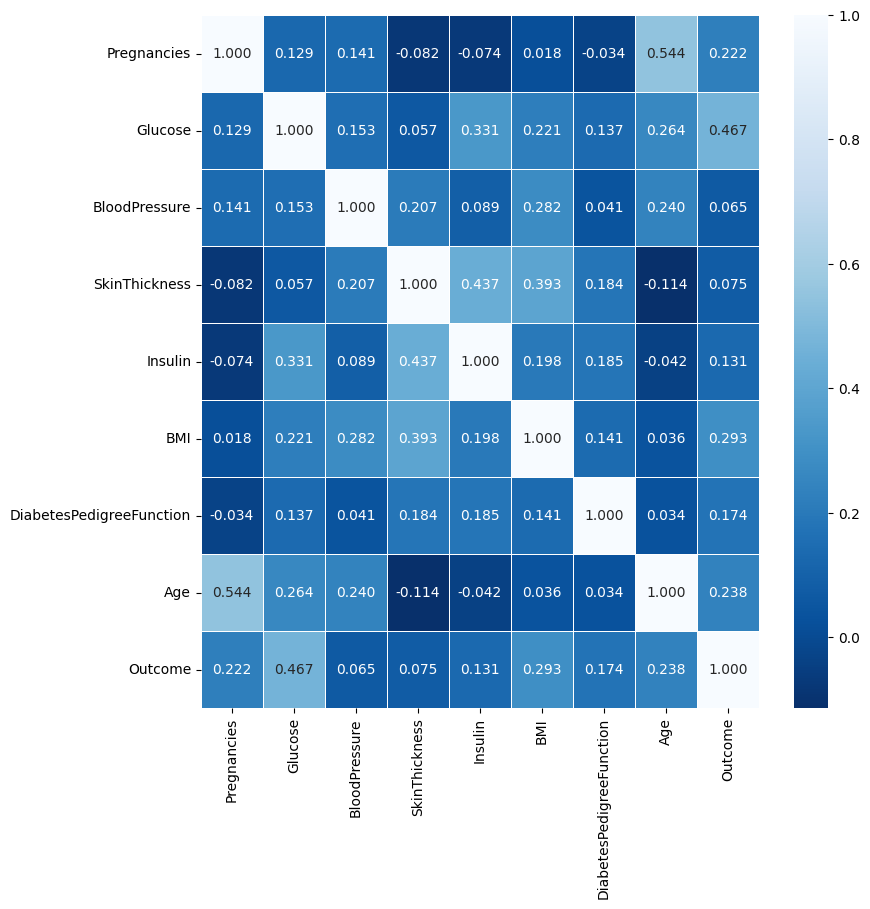

In [26]:
cor_mat=diabetes_df.corr()
fig,ax=plt.subplots(figsize=(9,9))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f" , cmap = "Blues_r")

In [8]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
diabetes_df["Outcome"].nunique()

2

In [5]:
y= diabetes_df.iloc[:,8]
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
X = diabetes_df.iloc[:, 0 : 8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train , y_test =train_test_split(X,y ,test_size= 0.2 ,random_state= 1)
X_train.shape ,X_test.shape ,y_train.shape , y_test.shape 

((614, 8), (154, 8), (614,), (154,))

In [23]:
import math
math.sqrt(len(y_test))-1

#When its an even number substrate your k by 1 to make it an odd number 
# P is the number of classification i.e (Either having diabetes or not having diabeties)

11.409673645990857

In [11]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=11 ,p = 2 ,metric="euclidean")

KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [12]:
KNN_model = KNN.fit(X_train,y_train)

In [13]:
pred = KNN_model.predict(X_test)

In [14]:
Score=KNN_model.score(X_test ,y_test)
Score

0.7727272727272727

In [21]:
from sklearn.metrics import accuracy_score

score2 = accuracy_score(y_test , pred)*100
     
score2

77.27272727272727

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)

cm

array([[86, 13],
       [22, 33]])

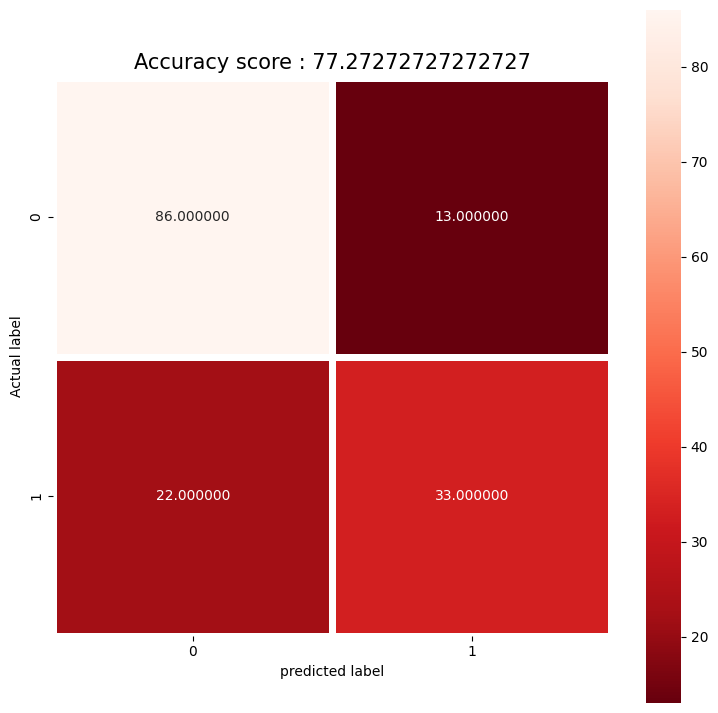

In [22]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True ,fmt="3f" ,linewidths= 5, square = True ,cmap="Reds_r");
plt.ylabel("Actual label");
plt.xlabel ("predicted label");
all_sample_title = "Accuracy score : {0}".format( score2);
plt.title(all_sample_title ,size = 15);
     

In [18]:
 from sklearn.metrics import classification_report
 cp = classification_report(y_test,pred)
 print("classification _report" ,cp )
     

classification _report               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



In [20]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)*100

65.34653465346534